In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글폰트 사용을 위한 환경 설정. '맑은 고딕'으로 폰트 설정
path ='C:\\WINDOWS\\Fonts\\malgunbd.ttf'
font_name = fm.FontProperties(fname = path, size =10).get_name()
plt.rc('font', family = font_name)
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\jupyter\kamp\경진대회용 주조 공정최적화 데이터셋.csv", encoding ='CP949')

In [3]:
data.head()

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


In [4]:
data.columns

Index(['Unnamed: 0', 'line', 'name', 'mold_name', 'time', 'date', 'count',
       'working', 'emergency_stop', 'molten_temp',
       'facility_operation_cycleTime', 'production_cycletime',
       'low_section_speed', 'high_section_speed', 'molten_volume',
       'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
       'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
       'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
       'physical_strength', 'Coolant_temperature', 'EMS_operation_time',
       'registration_time', 'passorfail', 'tryshot_signal', 'mold_code',
       'heating_furnace'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92015 non-null  int64  
 1   line                          92015 non-null  object 
 2   name                          92015 non-null  object 
 3   mold_name                     92015 non-null  object 
 4   time                          92015 non-null  object 
 5   date                          92015 non-null  object 
 6   count                         92015 non-null  int64  
 7   working                       92014 non-null  object 
 8   emergency_stop                92014 non-null  object 
 9   molten_temp                   89754 non-null  float64
 10  facility_operation_cycleTime  92015 non-null  int64  
 11  production_cycletime          92015 non-null  int64  
 12  low_section_speed             92014 non-null  float64
 13  h

In [6]:
data =data.drop(columns=['Unnamed: 0'])

In [7]:
unique_counts = data.nunique()
print(unique_counts)

line                                1
name                                1
mold_name                           1
time                               85
date                            54640
count                             334
working                             2
emergency_stop                      1
molten_temp                       113
facility_operation_cycleTime      195
production_cycletime              202
low_section_speed                 123
high_section_speed                230
molten_volume                     121
cast_pressure                     124
biscuit_thickness                  67
upper_mold_temp1                  317
upper_mold_temp2                  232
upper_mold_temp3                  117
lower_mold_temp1                  345
lower_mold_temp2                  323
lower_mold_temp3                  314
sleeve_temperature                590
physical_strength                 106
Coolant_temperature                35
EMS_operation_time                  5
registration

In [8]:
# 열 이름 영어 -> 한글 매칭 사전
column_name_mapping = {
    'line': '라인',
    'name': '이름',
    'mold_name': '금형명',
    'time': '시간',
    'date': '날짜',
    'count': '카운트',
    'working': '작동상태',
    'emergency_stop': '비상정지',
    'molten_temp': '용융온도',
    'facility_operation_cycleTime': '설비운전사이클타임',
    'production_cycletime': '생산사이클타임',
    'low_section_speed': '저속구간속도',
    'high_section_speed': '고속구간속도',
    'molten_volume': '용융체적',
    'cast_pressure': '주조압력',
    'biscuit_thickness': '비스킷두께',
    'upper_mold_temp1': '상부금형온도1',
    'upper_mold_temp2': '상부금형온도2',
    'upper_mold_temp3': '상부금형온도3',
    'lower_mold_temp1': '하부금형온도1',
    'lower_mold_temp2': '하부금형온도2',
    'lower_mold_temp3': '하부금형온도3',
    'sleeve_temperature': '슬리브온도',
    'physical_strength': '물리적강도',
    'Coolant_temperature': '냉각수온도',
    'EMS_operation_time': 'EMS작동시간',
    'registration_time': '등록시간',
    'passorfail': '합격여부',
    'tryshot_signal': '시도신호',
    'mold_code': '금형코드',
    'heating_furnace': '히팅퍼니스'
}

# 열 이름을 한글로 변경
data = data.rename(columns=column_name_mapping)



In [9]:
data.head()

,라인,이름,금형명,시간,날짜,카운트,작동상태,비상정지,용융온도,설비운전사이클타임,...,하부금형온도3,슬리브온도,물리적강도,냉각수온도,EMS작동시간,등록시간,합격여부,시도신호,금형코드,히팅퍼니스
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   라인         92015 non-null  object 
 1   이름         92015 non-null  object 
 2   금형명        92015 non-null  object 
 3   시간         92015 non-null  object 
 4   날짜         92015 non-null  object 
 5   카운트        92015 non-null  int64  
 6   작동상태       92014 non-null  object 
 7   비상정지       92014 non-null  object 
 8   용융온도       89754 non-null  float64
 9   설비운전사이클타임  92015 non-null  int64  
 10  생산사이클타임    92015 non-null  int64  
 11  저속구간속도     92014 non-null  float64
 12  고속구간속도     92014 non-null  float64
 13  용융체적       46885 non-null  float64
 14  주조압력       92014 non-null  float64
 15  비스킷두께      92014 non-null  float64
 16  상부금형온도1    92014 non-null  float64
 17  상부금형온도2    92014 non-null  float64
 18  상부금형온도3    91702 non-null  float64
 19  하부금형온도1    92014 non-null  float64
 20  하부금형온도

In [11]:
df= data

In [12]:
# 데이터프레임 내에서 int 타입 열을 모두 float으로 변환
df = df.astype({col: 'float' for col in df.select_dtypes(include='int').columns})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   라인         92015 non-null  object 
 1   이름         92015 non-null  object 
 2   금형명        92015 non-null  object 
 3   시간         92015 non-null  object 
 4   날짜         92015 non-null  object 
 5   카운트        92015 non-null  float64
 6   작동상태       92014 non-null  object 
 7   비상정지       92014 non-null  object 
 8   용융온도       89754 non-null  float64
 9   설비운전사이클타임  92015 non-null  float64
 10  생산사이클타임    92015 non-null  float64
 11  저속구간속도     92014 non-null  float64
 12  고속구간속도     92014 non-null  float64
 13  용융체적       46885 non-null  float64
 14  주조압력       92014 non-null  float64
 15  비스킷두께      92014 non-null  float64
 16  상부금형온도1    92014 non-null  float64
 17  상부금형온도2    92014 non-null  float64
 18  상부금형온도3    91702 non-null  float64
 19  하부금형온도1    92014 non-null  float64
 20  하부금형온도

In [14]:
df['히팅퍼니스'].unique()

array([nan, 'B', 'A'], dtype=object)

In [15]:
df['용융체적'].unique()

array([7.500e+01,       nan, 7.400e+01, 7.200e+01, 7.100e+01, 7.000e+01,
       6.900e+01, 6.700e+01, 6.600e+01, 6.500e+01, 6.400e+01, 6.300e+01,
       6.100e+01, 6.000e+01, 5.900e+01, 5.800e+01, 5.700e+01, 5.500e+01,
       5.300e+01, 5.200e+01, 5.100e+01, 5.000e+01, 4.800e+01, 4.900e+01,
       4.700e+01, 4.600e+01, 2.767e+03, 9.600e+01, 3.000e+01, 2.800e+01,
       2.700e+01, 2.500e+01, 9.700e+01, 9.900e+01, 9.500e+01, 9.400e+01,
       9.300e+01, 9.200e+01, 9.100e+01, 9.000e+01, 8.900e+01, 8.800e+01,
       8.700e+01, 8.600e+01, 8.500e+01, 8.400e+01, 8.100e+01, 8.000e+01,
       7.900e+01, 7.800e+01, 7.700e+01, 7.600e+01, 6.800e+01, 5.600e+01,
       5.400e+01, 4.500e+01, 4.400e+01, 4.300e+01, 4.200e+01, 4.100e+01,
       4.000e+01, 3.800e+01, 3.600e+01, 3.500e+01, 3.400e+01, 3.300e+01,
       3.200e+01, 3.100e+01, 2.900e+01, 9.800e+01, 8.300e+01, 8.200e+01,
       7.300e+01, 6.200e+01, 3.900e+01, 3.700e+01, 2.600e+01, 2.400e+01,
       1.000e+02, 1.010e+02, 2.300e+01, 2.200e+01, 

In [16]:
df.isnull().sum()

라인               0
이름               0
금형명              0
시간               0
날짜               0
카운트              0
작동상태             1
비상정지             1
용융온도          2261
설비운전사이클타임        0
생산사이클타임          0
저속구간속도           1
고속구간속도           1
용융체적         45130
주조압력             1
비스킷두께            1
상부금형온도1          1
상부금형온도2          1
상부금형온도3        313
하부금형온도1          1
하부금형온도2          1
하부금형온도3        313
슬리브온도            1
물리적강도            1
냉각수온도            1
EMS작동시간          0
등록시간             0
합격여부             1
시도신호         90096
금형코드             0
히팅퍼니스        49146
dtype: int64

In [17]:
# '합격여부' 열에 결측값이 있는 행 출력
missing_working_rows = df[df['합격여부'].isnull()]
missing_working_rows

,라인,이름,금형명,시간,날짜,카운트,작동상태,비상정지,용융온도,설비운전사이클타임,...,하부금형온도3,슬리브온도,물리적강도,냉각수온도,EMS작동시간,등록시간,합격여부,시도신호,금형코드,히팅퍼니스
19327,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-25,19:09:09,281.0,NaN,NaN,722.0,0.0,...,NaN,NaN,NaN,NaN,0.0,2019-01-25 19:09:09,NaN,NaN,8722.0,NaN


In [18]:
# '합격여부' 열에 결측값이 있는 행을 삭제
df = df.dropna(subset=['합격여부'])

In [19]:
df['용융온도'].describe()

count    89753.000000
mean       718.618475
std         51.728946
min          0.000000
25%        713.000000
50%        728.000000
75%        730.000000
max        735.000000
Name: 용융온도, dtype: float64

In [20]:
df['상부금형온도3'].describe()

count    91702.000000
mean      1320.032278
std        392.371589
min         42.000000
25%       1449.000000
50%       1449.000000
75%       1449.000000
max       1449.000000
Name: 상부금형온도3, dtype: float64

In [21]:
unique_counts = df.nunique()
print(unique_counts)

라인               1
이름               1
금형명              1
시간              85
날짜           54639
카운트            334
작동상태             2
비상정지             1
용융온도           113
설비운전사이클타임      194
생산사이클타임        202
저속구간속도         123
고속구간속도         230
용융체적           121
주조압력           124
비스킷두께           67
상부금형온도1        317
상부금형온도2        232
상부금형온도3        117
하부금형온도1        345
하부금형온도2        323
하부금형온도3        314
슬리브온도          590
물리적강도          106
냉각수온도           35
EMS작동시간          5
등록시간         91721
합격여부             2
시도신호             1
금형코드             7
히팅퍼니스            2
dtype: int64


In [22]:
df =df.drop(columns=['라인','이름','비상정지','금형명','시도신호'])

In [23]:
df =df.drop(columns=['설비운전사이클타임','시간','날짜','등록시간','생산사이클타임','금형코드'])

In [24]:
df =df.drop(columns=['용융체적','히팅퍼니스'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92014 entries, 0 to 92014
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   카운트      92014 non-null  float64
 1   작동상태     92014 non-null  object 
 2   용융온도     89753 non-null  float64
 3   저속구간속도   92014 non-null  float64
 4   고속구간속도   92014 non-null  float64
 5   주조압력     92014 non-null  float64
 6   비스킷두께    92014 non-null  float64
 7   상부금형온도1  92014 non-null  float64
 8   상부금형온도2  92014 non-null  float64
 9   상부금형온도3  91702 non-null  float64
 10  하부금형온도1  92014 non-null  float64
 11  하부금형온도2  92014 non-null  float64
 12  하부금형온도3  91702 non-null  float64
 13  슬리브온도    92014 non-null  float64
 14  물리적강도    92014 non-null  float64
 15  냉각수온도    92014 non-null  float64
 16  EMS작동시간  92014 non-null  float64
 17  합격여부     92014 non-null  float64
dtypes: float64(17), object(1)
memory usage: 13.3+ MB


In [26]:
df.isnull().sum()

카운트           0
작동상태          0
용융온도       2261
저속구간속도        0
고속구간속도        0
주조압력          0
비스킷두께         0
상부금형온도1       0
상부금형온도2       0
상부금형온도3     312
하부금형온도1       0
하부금형온도2       0
하부금형온도3     312
슬리브온도         0
물리적강도         0
냉각수온도         0
EMS작동시간       0
합격여부          0
dtype: int64

In [27]:
unique_counts = df.nunique()
print(unique_counts)

카운트        334
작동상태         2
용융온도       113
저속구간속도     123
고속구간속도     230
주조압력       124
비스킷두께       67
상부금형온도1    317
상부금형온도2    232
상부금형온도3    117
하부금형온도1    345
하부금형온도2    323
하부금형온도3    314
슬리브온도      590
물리적강도      106
냉각수온도       35
EMS작동시간      5
합격여부         2
dtype: int64


In [28]:
df = df[df['작동상태'] != '정지']

In [29]:
df =df.drop(columns=['작동상태'])

In [30]:
df['카운트'].describe()

count    91963.000000
mean       148.547231
std         87.944944
min          1.000000
25%         73.000000
50%        146.000000
75%        222.000000
max        334.000000
Name: 카운트, dtype: float64

In [31]:
df['용융온도'].describe()

count    89702.000000
mean       718.614936
std         51.743010
min          0.000000
25%        713.000000
50%        728.000000
75%        730.000000
max        735.000000
Name: 용융온도, dtype: float64

In [32]:
df[df['용융온도'] <200].count()

카운트        445
용융온도       445
저속구간속도     445
고속구간속도     445
주조압력       445
비스킷두께      445
상부금형온도1    445
상부금형온도2    445
상부금형온도3    445
하부금형온도1    445
하부금형온도2    445
하부금형온도3    445
슬리브온도      445
물리적강도      445
냉각수온도      445
EMS작동시간    445
합격여부       445
dtype: int64

In [33]:
df[df['하부금형온도3']<=800].count()

카운트        30
용융온도       30
저속구간속도     30
고속구간속도     30
주조압력       30
비스킷두께      30
상부금형온도1    30
상부금형온도2    30
상부금형온도3    30
하부금형온도1    30
하부금형온도2    30
하부금형온도3    30
슬리브온도      30
물리적강도      30
냉각수온도      30
EMS작동시간    30
합격여부       30
dtype: int64

In [34]:
# 중앙값 대체할 컬럼 목록
columns_to_fill = ['용융온도', '상부금형온도3', '하부금형온도3']

# 각 열의 결측치를 중앙값으로 대체
for col in columns_to_fill:
    df[col].fillna(df[col].median(), inplace=True)

# 결과 확인
print(df.isnull().sum())

카운트        0
용융온도       0
저속구간속도     0
고속구간속도     0
주조압력       0
비스킷두께      0
상부금형온도1    0
상부금형온도2    0
상부금형온도3    0
하부금형온도1    0
하부금형온도2    0
하부금형온도3    0
슬리브온도      0
물리적강도      0
냉각수온도      0
EMS작동시간    0
합격여부       0
dtype: int64


In [35]:
import pandas as pd

# 복사본 생성 (원본 데이터 보호)
filtered_df = df.copy()

# 작업할 컬럼 리스트
columns_to_check = ['저속구간속도', '용융온도', '고속구간속도', '주조압력', '비스킷두께', 
                    '상부금형온도1', '상부금형온도2', '상부금형온도3', 
                    '하부금형온도1', '하부금형온도2', '하부금형온도3', 
                    '슬리브온도', '물리적강도', '냉각수온도']

# 각 컬럼에 대해 상/하위 0.5% 극단값 제거
for column in columns_to_check:
    # IQR 및 상위/하위 임계값 계산
    Q1 = filtered_df[column].quantile(0.25)
    Q3 = filtered_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    # 상위 및 하위 0.5% 임계값 계산
    lower_5_percent = filtered_df[column].quantile(0.005)
    upper_5_percent = filtered_df[column].quantile(0.995)

    # 상위/하위 0.5%의 극단값 중에서 3*IQR 범위 밖에 있는 값만 제거
    filtered_df = filtered_df[~((filtered_df[column] < lower_5_percent) & (filtered_df[column] < lower_bound)) &
                              ~((filtered_df[column] > upper_5_percent) & (filtered_df[column] > upper_bound))]

# 결과 확인
print(f"Before filtering: {len(df)} rows")
print(f"After filtering: {len(filtered_df)} rows")


Before filtering: 91963 rows
After filtering: 87920 rows


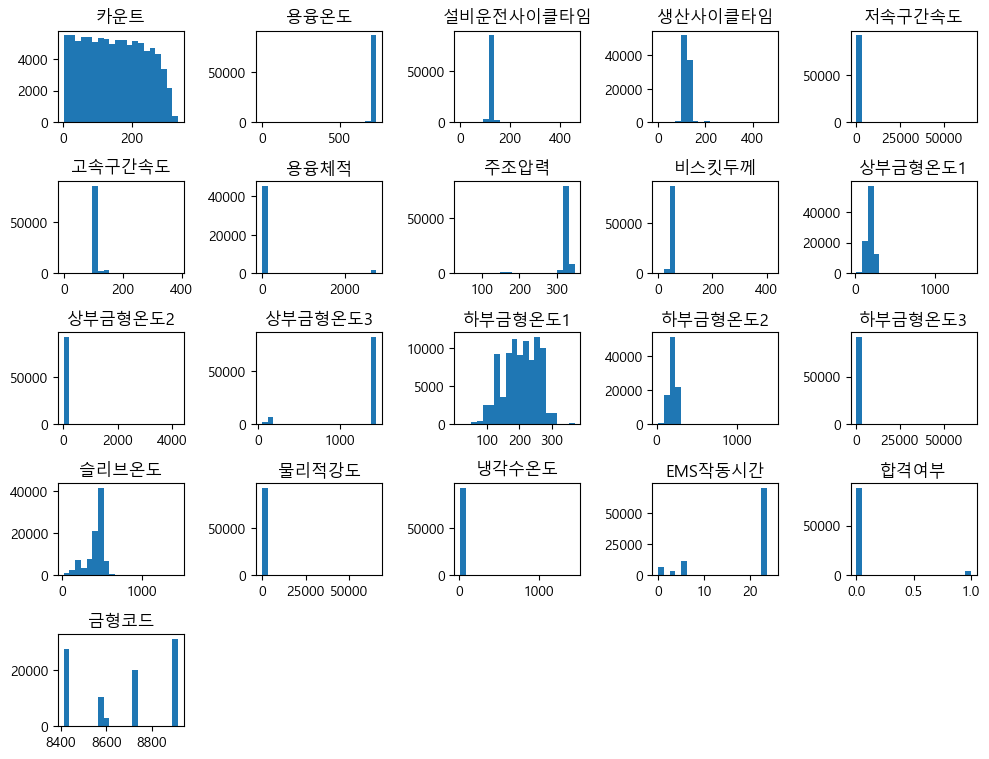

In [58]:
data.hist(bins=20, figsize=(10,12), grid=False, layout=(8,5))
plt.tight_layout()

In [37]:
print(df[df['합격여부']==1].count(),filtered_df[filtered_df['합격여부']==1].count(),df[df['합격여부']==0].count(),filtered_df[filtered_df['합격여부']==0].count())

카운트        3967
용융온도       3967
저속구간속도     3967
고속구간속도     3967
주조압력       3967
비스킷두께      3967
상부금형온도1    3967
상부금형온도2    3967
상부금형온도3    3967
하부금형온도1    3967
하부금형온도2    3967
하부금형온도3    3967
슬리브온도      3967
물리적강도      3967
냉각수온도      3967
EMS작동시간    3967
합격여부       3967
dtype: int64 카운트        2510
용융온도       2510
저속구간속도     2510
고속구간속도     2510
주조압력       2510
비스킷두께      2510
상부금형온도1    2510
상부금형온도2    2510
상부금형온도3    2510
하부금형온도1    2510
하부금형온도2    2510
하부금형온도3    2510
슬리브온도      2510
물리적강도      2510
냉각수온도      2510
EMS작동시간    2510
합격여부       2510
dtype: int64 카운트        87996
용융온도       87996
저속구간속도     87996
고속구간속도     87996
주조압력       87996
비스킷두께      87996
상부금형온도1    87996
상부금형온도2    87996
상부금형온도3    87996
하부금형온도1    87996
하부금형온도2    87996
하부금형온도3    87996
슬리브온도      87996
물리적강도      87996
냉각수온도      87996
EMS작동시간    87996
합격여부       87996
dtype: int64 카운트        85410
용융온도       85410
저속구간속도     85410
고속구간속도     85410
주조압력       85410
비스킷두께      85410
상부금형온도1    85410
상부금형온도2  

In [38]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87920 entries, 0 to 92014
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   카운트      87920 non-null  float64
 1   용융온도     87920 non-null  float64
 2   저속구간속도   87920 non-null  float64
 3   고속구간속도   87920 non-null  float64
 4   주조압력     87920 non-null  float64
 5   비스킷두께    87920 non-null  float64
 6   상부금형온도1  87920 non-null  float64
 7   상부금형온도2  87920 non-null  float64
 8   상부금형온도3  87920 non-null  float64
 9   하부금형온도1  87920 non-null  float64
 10  하부금형온도2  87920 non-null  float64
 11  하부금형온도3  87920 non-null  float64
 12  슬리브온도    87920 non-null  float64
 13  물리적강도    87920 non-null  float64
 14  냉각수온도    87920 non-null  float64
 15  EMS작동시간  87920 non-null  float64
 16  합격여부     87920 non-null  float64
dtypes: float64(17)
memory usage: 12.1 MB


In [39]:
df = filtered_df

In [40]:
# 상부 금형 평균 온도
df['상부_금형_평균온도'] = (df['상부금형온도1'] + df['상부금형온도2'] + df['상부금형온도3']) / 3

# 하부 금형 평균 온도
df['하부_금형_평균온도'] = (df['하부금형온도1'] + df['하부금형온도2'] + df['하부금형온도3']) / 3

# 상부 금형 온도의 표준편차
df['상부금형온도_표준편차'] = df[['상부금형온도1', '상부금형온도2', '상부금형온도3']].std(axis=1)

# 하부 금형 온도의 표준편차
df['하부금형온도_표준편차'] = df[['하부금형온도1', '하부금형온도2', '하부금형온도3']].std(axis=1)

df['상하부_평균온도_차이'] = (df['하부_금형_평균온도'] - df['상부_금형_평균온도']).abs()

# 5. 비스킷 두께 대비 주조 압력 비율
df['비스킷두께_대비_주조압력_비율'] = df['주조압력'] / df['비스킷두께']

# 6. 저속/고속 구간 속도 비율
df['저속_고속_구간_속도비율'] = df['저속구간속도'] / df['고속구간속도']

# 7. 물리적 강도 대비 주조 압력 비율
df['물리적강도_대비_주조압력_비율'] = df['물리적강도'] / df['주조압력']

df['냉각수_상부_금형_온도_차이'] = (df['상부_금형_평균온도'] - df['냉각수온도']).abs()
df['냉각수_하부_금형_온도_차이'] = (df['하부_금형_평균온도'] - df['냉각수온도']).abs()

# 결과 확인
df.head()


,카운트,용융온도,저속구간속도,고속구간속도,주조압력,비스킷두께,상부금형온도1,상부금형온도2,상부금형온도3,하부금형온도1,...,상부_금형_평균온도,하부_금형_평균온도,상부금형온도_표준편차,하부금형온도_표준편차,상하부_평균온도_차이,비스킷두께_대비_주조압력_비율,저속_고속_구간_속도비율,물리적강도_대비_주조압력_비율,냉각수_상부_금형_온도_차이,냉각수_하부_금형_온도_차이
0,258.0,731.0,110.0,112.0,331.0,35.0,198.0,116.0,1449.0,234.0,...,587.666667,666.333333,747.062469,679.048108,78.666667,9.457143,0.982143,2.114804,553.666667,632.333333
24,1.0,731.0,109.0,112.0,176.0,49.0,26.0,55.0,1449.0,30.0,...,510.000000,600.666667,813.327117,749.142399,90.666667,3.591837,0.973214,3.977273,475.000000,565.666667
26,2.0,731.0,109.0,112.0,331.0,47.0,31.0,65.0,1449.0,30.0,...,515.000000,607.333333,809.046352,745.516152,92.333333,7.042553,0.973214,2.138973,481.000000,573.333333
28,3.0,731.0,110.0,112.0,331.0,46.0,36.0,73.0,1449.0,31.0,...,519.333333,607.666667,805.327470,745.129072,88.333333,7.195652,0.982143,2.135952,485.333333,573.666667
30,4.0,730.0,110.0,112.0,331.0,50.0,41.0,78.0,1449.0,32.0,...,522.666667,625.000000,802.441483,736.201739,102.333333,6.620000,0.982143,2.132931,488.666667,591.000000


In [43]:
!pip install imblearn.over_sampling

ERROR: Could not find a version that satisfies the requirement imblearn.over_sampling (from versions: none)
ERROR: No matching distribution found for imblearn.over_sampling


In [45]:
# 필요한 라이브러리 임포트
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 정의
X = df.drop(columns=['합격여부'])  # '합격여부'를 제외한 모든 컬럼을 독립 변수로 사용
y = df['합격여부']  # '합격여부' 컬럼을 종속 변수로 사용

# 학습용 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 결과 확인
print("원래 학습 데이터 클래스 분포:\n", y_train.value_counts())
print("SMOTE 적용 후 학습 데이터 클래스 분포:\n", y_train_resampled.value_counts())

  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\USER\anaconda3\envs\3.9.18\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


원래 학습 데이터 클래스 분포:
 합격여부
0.0    68341
1.0     1995
Name: count, dtype: int64
SMOTE 적용 후 학습 데이터 클래스 분포:
 합격여부
0.0    68341
1.0    68341
Name: count, dtype: int64


In [50]:
df['상부금형온도3'].value_counts()

상부금형온도3
1449.0    79492
113.0       326
114.0       309
115.0       298
112.0       293
          ...  
164.0         2
171.0         1
193.0         1
172.0         1
166.0         1
Name: count, Length: 69, dtype: int64

In [53]:
import numpy as np
df['상부금형온도3_log'] = np.log(df['상부금형온도3'].replace(0, np.nan)).fillna(0)  # Handling any zeroes with NaN before taking log


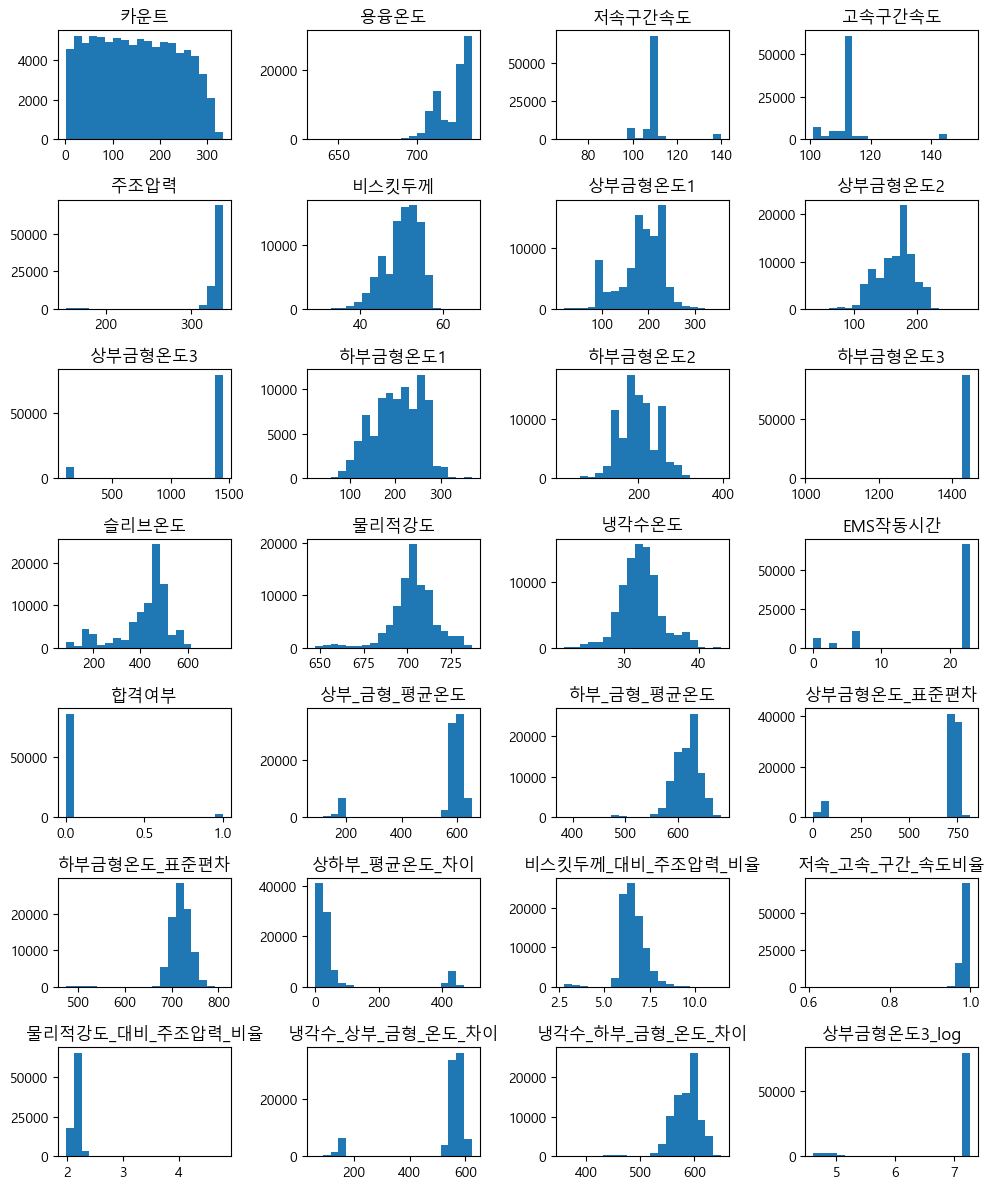

In [56]:
df.hist(bins=20, figsize=(10,12), grid=False, layout=(7,4))
plt.tight_layout()

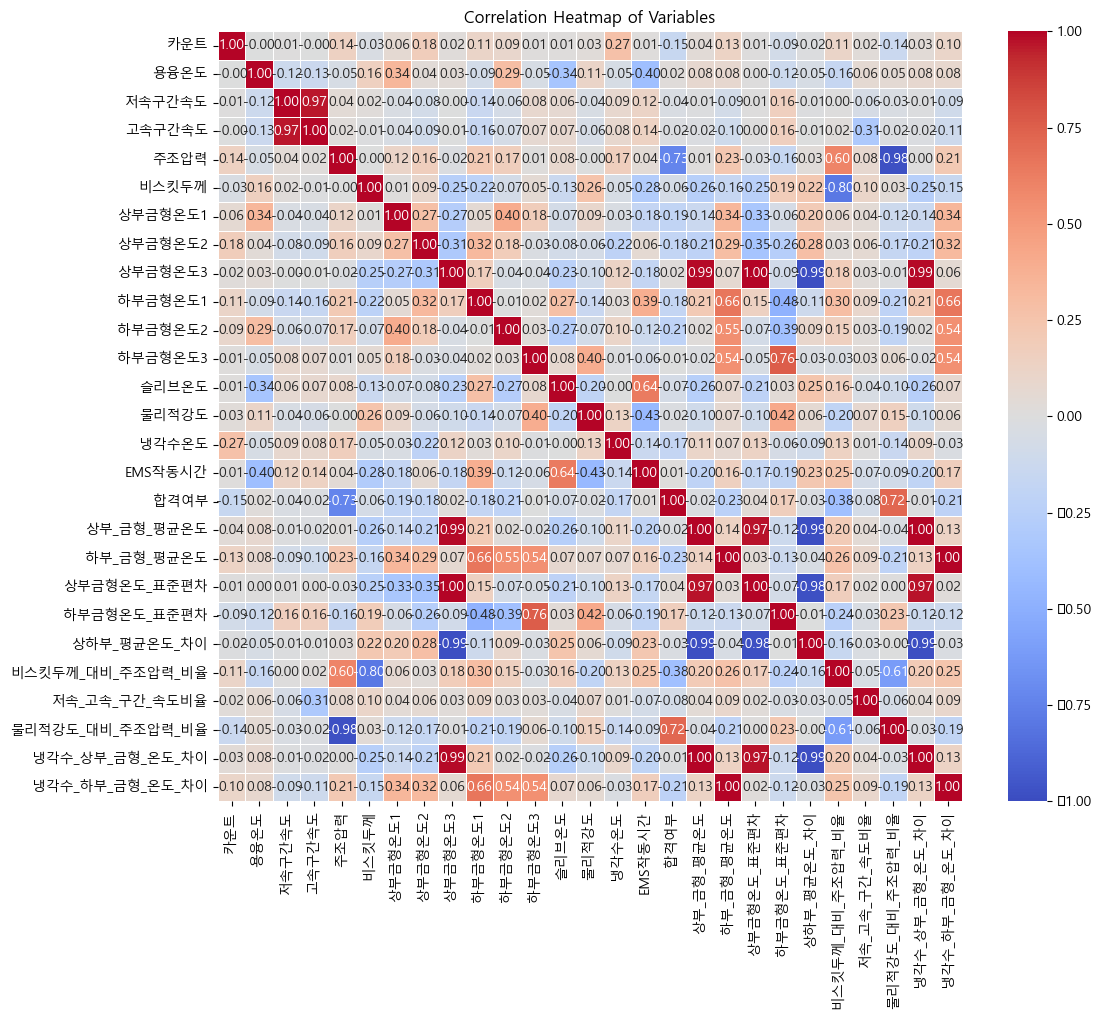

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# 상관관계 계산
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))  # 히트맵 크기 설정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables")
plt.show()


In [60]:
df['상부금형온도3'].value_counts()

상부금형온도3
1449.0    79492
113.0       326
114.0       309
115.0       298
112.0       293
          ...  
164.0         2
171.0         1
193.0         1
172.0         1
166.0         1
Name: count, Length: 69, dtype: int64

In [47]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# VIF 계산에 사용할 데이터프레임 설정
X = df.select_dtypes(include=[float, int])  # 수치형 데이터만 선택

# 스케일링 (선택적, VIF 계산에 영향이 없습니다)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# VIF 출력
print(vif_data)


             Feature           VIF
0                카운트  1.170765e+00
1               용융온도  1.560797e+00
2             저속구간속도  9.562785e+02
3             고속구간속도  1.037593e+03
4               주조압력  1.321167e+02
5              비스킷두께  5.499571e+01
6            상부금형온도1  5.412613e+04
7            상부금형온도2  1.961850e+04
8            상부금형온도3  6.343769e+03
9            하부금형온도1           inf
10           하부금형온도2           inf
11           하부금형온도3           inf
12             슬리브온도  2.233003e+00
13             물리적강도  4.361136e+00
14             냉각수온도  1.423780e+05
15           EMS작동시간  3.083078e+00
16              합격여부  2.359444e+00
17        상부_금형_평균온도  2.463207e+03
18        하부_금형_평균온도  9.514213e+03
19       상부금형온도_표준편차  1.220542e+03
20       하부금형온도_표준편차  2.023299e+03
21       상하부_평균온도_차이  2.369306e+02
22  비스킷두께_대비_주조압력_비율  8.457203e+01
23     저속_고속_구간_속도비율  6.933468e+01
24  물리적강도_대비_주조압력_비율  1.117178e+02
25   냉각수_상부_금형_온도_차이  8.327955e+03
26   냉각수_하부_금형_온도_차이  6.644093e+04
